In [257]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import f
import matplotlib.pyplot as plt

In [258]:
df = pd.read_csv('/Users/PJizzle/Code/Data Mining Project/vgsales.csv')

In [259]:
df = df.drop('NA_Sales', axis=1)

In [260]:
df = df.drop('EU_Sales', axis=1)

In [261]:
df = df.drop('JP_Sales', axis=1)

In [262]:
df

,Year,Genre,Global_Sales,Rank
0,2006.0,Sports,82.74,1
1,1985.0,Platform,40.24,2
2,2008.0,Racing,35.82,3
3,2009.0,Sports,33.00,4
4,1996.0,Role-Playing,31.37,5
5,1989.0,Puzzle,30.26,6
6,2006.0,Platform,30.01,7
7,2006.0,Misc,29.02,8
8,2009.0,Platform,28.62,9
9,1984.0,Shooter,28.31,10


In [263]:
classes = pd.Series(df['Genre'].unique(), name='Genre')

In [264]:
classes

0           Sports
1         Platform
2           Racing
3     Role-Playing
4           Puzzle
5             Misc
6          Shooter
7       Simulation
8           Action
9         Fighting
10       Adventure
11        Strategy
Name: Genre, dtype: object

In [265]:
classes=classes.to_frame()

In [266]:
type(classes)

pandas.core.frame.DataFrame

In [267]:
classes['Sports'] = (classes['Genre'] == 'Sports') + 0
classes['Platform'] = (classes['Genre'] == 'Platform') + 0
classes['Racing'] = (classes['Genre'] == 'Racing') + 0
classes['Role-Playing'] = (classes['Genre'] == 'Role-Playing') + 0
classes['Puzzle'] = (classes['Genre'] == 'Puzzle') + 0
classes['Misc'] = (classes['Genre'] == 'Misc') + 0
classes['Shooter'] = (classes['Genre'] == 'Shooter') + 0
classes['Simulation'] = (classes['Genre'] == 'Simulation') + 0
classes['Action'] = (classes['Genre'] == 'Action') + 0
classes['Fighting'] = (classes['Genre'] == 'Fighting') + 0
classes['Adventure'] = (classes['Genre'] == 'Adventure') + 0
classes['Strategy'] = (classes['Genre'] == 'Strategy') + 0

In [268]:
df = df.dropna()

In [269]:
df.isnull().values.any()

False

In [270]:
df2 = pd.merge(df, classes)

In [271]:
df2
len(df2)

16327

In [272]:
df_fighting = (df2['Year'] == 2015) & (df2['Genre'] == 'Sports')
fighting2015 = df2[df_fighting]
type(fighting2015)

pandas.core.frame.DataFrame

In [273]:
fighting2015 = fighting2015.reset_index()


In [274]:
fighting2015.index = fighting2015.index + 1
fighting2015 = fighting2015.reset_index()
fighting2015 = fighting2015.drop('index', axis=1)
fighting2015.head()

,level_0,Year,Genre,Global_Sales,Rank,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
0,1,2015.0,Sports,8.49,78,1,0,0,0,0,0,0,0,0,0,0,0
1,2,2015.0,Sports,3.85,315,1,0,0,0,0,0,0,0,0,0,0,0
2,3,2015.0,Sports,3.23,417,1,0,0,0,0,0,0,0,0,0,0,0
3,4,2015.0,Sports,3.22,419,1,0,0,0,0,0,0,0,0,0,0,0
4,5,2015.0,Sports,2.85,514,1,0,0,0,0,0,0,0,0,0,0,0


In [275]:
fighting2015["Global_Sales"].mean()

0.6700000000000003

In [276]:
X = fighting2015[['level_0']]
X.shape

(62, 1)

In [277]:
df_NoYear = (df2['Year'] < 2015) & (df2['Year'] > 2003) & (df2['Genre'] == 'Sports')
df_New = df2[df_NoYear]
type(df_New)
df_New

,Year,Genre,Global_Sales,Rank,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
0,2006.0,Sports,82.74,1,1,0,0,0,0,0,0,0,0,0,0,0
1,2009.0,Sports,33.00,4,1,0,0,0,0,0,0,0,0,0,0,0
2,2007.0,Sports,22.72,14,1,0,0,0,0,0,0,0,0,0,0,0
3,2009.0,Sports,22.00,15,1,0,0,0,0,0,0,0,0,0,0,0
5,2007.0,Sports,8.06,86,1,0,0,0,0,0,0,0,0,0,0,0
6,2013.0,Sports,6.90,113,1,0,0,0,0,0,0,0,0,0,0,0
7,2010.0,Sports,6.81,118,1,0,0,0,0,0,0,0,0,0,0,0
8,2011.0,Sports,6.69,122,1,0,0,0,0,0,0,0,0,0,0,0
9,2014.0,Sports,6.59,125,1,0,0,0,0,0,0,0,0,0,0,0
10,2010.0,Sports,6.24,140,1,0,0,0,0,0,0,0,0,0,0,0


In [278]:
y = fighting2015['Global_Sales']

In [279]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
x2_train, x2_test, y2_train, y2_test = sklearn.model_selection.train_test_split(X,y)

In [280]:
reg = linear_model.LinearRegression()
reg2 = linear_model.LinearRegression()

In [281]:
reg.fit(np.log(1+x_train), np.log(y_train))
reg2.fit(np.log(1+x2_train), np.log(y2_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [282]:
y_pred = np.exp(reg.predict(np.log(1+x_test)))
y2_pred = np.exp(reg2.predict(np.log(1+x2_test)))

In [283]:
print("variance score: %.2f" % r2_score(y2_test, y2_pred))

variance score: 0.98


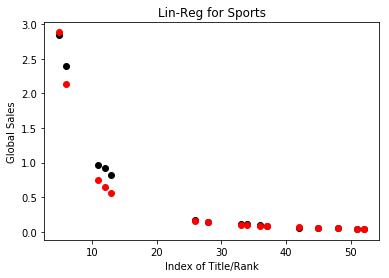

In [284]:
plt.scatter(x2_test, y2_test,  color='black')
plt.plot(x2_test, y2_pred, 'o', color='red', linewidth=2)
plt.xlabel('Index of Title/Rank')
plt.ylabel('Global Sales')
plt.title('Lin-Reg for Sports')
plt.show()

In [285]:
reg2.coef_

array([-1.94608627])

In [286]:
reg2.intercept_

4.5461888524858196

In [287]:
y2_pred.sort()
y2_pred

array([ 0.04157145,  0.0431414 ,  0.04843032,  0.05476645,  0.06244738,
        0.07943092,  0.08366213,  0.093217  ,  0.09862673,  0.13441015,
        0.15446403,  0.55452445,  0.64055271,  0.74852262,  2.13673687,
        2.88426574])

In [288]:
y2_test.sort_values(ascending=True)

50    0.04
51    0.04
47    0.05
41    0.06
44    0.06
36    0.09
35    0.10
32    0.11
33    0.11
27    0.14
25    0.17
12    0.82
11    0.92
10    0.97
5     2.40
4     2.85
Name: Global_Sales, dtype: float64